# Introduction




This notebook will serve as a gradual introduction to the PyTorch Machine Learning library. We'll run through the following topics:

1. Some useful key terms that will show up throughout this workshop series.
2. Setting up PyTorch
3. Getting familiar with Tensors and Tensor operations
4. Automatic differentiation
5. Using built-in models.

# Key Terms

The following terms might be useful to refer back to throughout the course:

* Activation Function - A way to introduce non-linearity into a neural network.
* Loss Function - A way to compute the **Error** in a neural network
* Error - The difference between the **intended** and **actual** output of a neural net.
* Optimiser - An algorithm which changes the weights and biases of a network.
* Forward Pass - Place some input into the network to generate a prediction.
* Backward Pass - Calculate the **gradients**
* Gradient - The direction the weights need to move to minimise the **Loss**
* Weight - Strength of inter-neuron connections.
* Bias - An offsetting term which provides more power to the network.
* Layer - A collection of artificial neurons. Data passes through the network (generally) one layer at a time.


# Pytorch Setup

First we need to install the neural network libraries. Note that if you're following along outside of a notebook you'll need to install these packages locally. More info here: https://pytorch.org/get-started/locally/

**How to use this notebook:** You can run through the page, executing each code block. However, I also suggest you code-along with the notebook in a local python script, and execute this on your own machine.

The following command (if running locally, omit the exclamation mark) will install Pytorch, Numpy, and some helpful libraries into this notebook for later use.

In [1]:
!pip3 install torch torchaudio torchvision torchtext torchdata scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 878.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

Import torch so we can use it throughout the notebook.

In [ ]:
import torch
import numpy as np

# Working with Tensors

## Creating Tensors

PyTorch uses the *Tensor* datatype to represent information. You can think of a tensor as a generalised matrix with more than two dimensions - or a multidimensional array.

PyTorch provides many useful methods to create and work with Tensor data.

In [ ]:
# You can create a completely empty Tensor with torch.empty(<dim1>, <dim2>, ...)
my_tensor = torch.empty(4, 8)

print(type(my_tensor))
print(my_tensor)

<class 'torch.Tensor'>
tensor([[1.1787e+29, 4.3080e-41, 6.1925e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.8788e+31, 1.7220e+22, 2.1715e-18, 2.6688e-09,
         1.0487e+21, 2.1067e-07],
        [2.6702e-06, 2.6705e-06, 3.3063e-09, 1.3666e+22, 4.2093e+21, 4.1996e-08,
         1.4580e-19, 1.1495e+24],
        [3.0881e+29, 1.5766e-19, 1.8889e+31, 7.2065e+31, 2.8404e+29, 2.3089e-12,
         1.9421e+31, 2.7491e+20]])


The above code creates an empty tensor with four rows and eight columns. PyTorch has allocated the memory, but not cleared it - hence the random values.

In [ ]:
# A 3d tensor
my_tensor = torch.empty(4, 8, 2)
print(my_tensor)

# 4d
my_tensor = torch.empty(4, 8, 2, 6)
print(my_tensor)

tensor([[[ 0.0000e+00,  0.0000e+00],
         [ 6.0055e-18,  0.0000e+00],
         [ 7.3195e-19,  0.0000e+00],
         [ 2.0669e+25,  4.3079e-41],
         [ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 1.4013e-45,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [ 7.4269e-44,  0.0000e+00]],

        [[ 1.4013e-45,  0.0000e+00],
         [-1.7014e+38,  1.1515e-40],
         [ 4.5919e-41,  4.1478e-43],
         [ 3.6013e-43,  0.0000e+00],
         [ 1.1787e+29,  4.3080e-41],
         [ 1.1787e+29,  4.3080e-41],
         [ 7.0475e-18,  0.0000e+00],
         [ 6.8982e-18,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00],
         [ 6.0055e-18,  0.0000e+00],
         [ 7.3195e-19,  0.0000e+

It's more common to initialise Tensors with some known values.

In [ ]:
# Initialise a tensor which only contains zero
my_tensor = torch.zeros(4, 8)
print(my_tensor)

# Initialise a tensor which only contains ones
my_tensor = torch.ones(4, 8)
print(my_tensor)

# Initialise a tensor which is completely random (0 - 1.0)
my_tensor = torch.rand(4, 8)
print(my_tensor)


tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[0.5344, 0.8714, 0.3270, 0.2067, 0.1585, 0.2608, 0.7296, 0.8660],
        [0.0106, 0.7526, 0.7011, 0.6705, 0.4243, 0.6860, 0.6559, 0.8989],
        [0.4839, 0.4394, 0.6512, 0.7978, 0.0269, 0.2251, 0.2498, 0.7302],
        [0.2094, 0.4766, 0.4828, 0.4360, 0.7813, 0.7858, 0.9811, 0.5422]])


Many tensor operations in PyTorch which operate on two or more tensors require those tensors to be the same *shape*. This means they have the same dimensions.

You can check the dimensions of a tensor with the `.shape()` method.

In [ ]:
my_tensor = torch.ones(4, 8)
print(my_tensor.shape)

torch.Size([4, 8])


You can use this to create new tensors which match the existing tensors shape.

In [ ]:
my_new_tensor = torch.ones(my_tensor.shape)
print(my_new_tensor.shape)

# You can also use "is_like"
# ones_like, zeros_like, empty_like, rand_like all exist.
my_new_tensor = torch.ones_like(my_tensor)
print(my_new_tensor.shape)

torch.Size([4, 8])
torch.Size([4, 8])


You can also build Tensors explicitly from Python collections **and** numpy arrays. In general, the integration between numpy and PyTorch is very good: if you've already worked with numpy, the torch operations should seem familiar.



In [ ]:
my_list = [1, 2, 3 , 4]
my_2d_list = [[1,2,3], [1,2,3]]

my_t = torch.tensor(my_list)
my_t2 = torch.tensor(my_2d_list)

print(my_t.shape)
print(my_t2.shape)


torch.Size([4])
torch.Size([2, 3])


In [ ]:
my_np_arr = np.ones((4, 8))
print(type(my_np_arr))

my_np_t = torch.tensor(my_np_arr)
print(type(my_np_t))
print(my_np_t.shape)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([4, 8])


## Data types in Tensors

Tensors can have different data types, which defines the type of data which can be stored within them.

You can create tensors which store 32 and 64 bit floats, 8 - 64 bit integers, complex types, and so on. You can find a full list here: [PyTorch Data Types](https://pytorch.org/docs/stable/tensor_attributes.html#torch.dtype)

By default, PyTorch creates tensors with the float32 data type. This works for the majority of cases, with 8-bit unsigned integer tensors (storing data from 0 - 255) making up a lot of the rest.

This mostly comes into effect when loading and saving data: when building a neural network, the weights and biases will usually be float32 tensors.

You can use `dtype` to check the type of a tensor

In [ ]:
t = torch.ones(3, 5)
print(t.dtype)
print(t)

torch.float32
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


You can change the type of a tensor with the `.to()` method.

In [ ]:
# Float to uint8, re-using tensor above.
t = t.to(torch.uint8)
print(t.dtype)
print(t)

# Notice the decimal has been dropped.

torch.uint8
tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.uint8)


In [ ]:
t = torch.rand(5, 7)
print(t)

# Be careful - converting a tensor to a datatype which cannot
# support the information within that tensor will cause it to be lost!

t = t.to(torch.uint8)
print(t)

tensor([[0.1462, 0.4140, 0.6930, 0.1968, 0.5510, 0.3695, 0.0461],
        [0.4910, 0.3232, 0.5354, 0.3600, 0.8546, 0.7710, 0.6086],
        [0.2819, 0.4995, 0.5710, 0.7374, 0.5542, 0.7368, 0.1347],
        [0.2213, 0.1272, 0.6856, 0.5460, 0.2828, 0.9501, 0.1029],
        [0.7207, 0.8212, 0.1003, 0.4092, 0.3063, 0.6494, 0.4984]])
tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]], dtype=torch.uint8)


There are also some convenience methods available: `.float()` `.int()`, among others. Note you have less control with these methods than the above.

In [ ]:
t = t.float()
print(t.dtype)

t = t.int()
print(t.dtype)

torch.float32
torch.int32


## Tensor Manipulation

Tensors can be modified with a variety of arithmetical operations.

In [ ]:
t = torch.ones(2, 4)

print(t + 5)
print((t + 3) / 1)
print((t + 3) ** 2)

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.]])
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.]])
tensor([[16., 16., 16., 16.],
        [16., 16., 16., 16.]])


When adding scalars, note the operation is applied to every element of the tensor.

Operations involving two (or more) tensors generally require those tensors be the same shape.

In [ ]:
t = torch.ones(3, 4)
t2 = torch.ones(3, 4) * 3

print(t + t2)
print((t+1) * t2)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


In [ ]:
# If the tensors ARE not the same shape:

t = torch.ones(3, 4)
t2 = torch.ones(4, 3) * 3

print(t + t2)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

However, if there ARE similarities in the tensor shape, PyTorch can attempt to do *broadcasting*.



In [ ]:
t = torch.rand(2, 4)
t1 = torch.ones(1, 4) * 2
t2 = t * t1

print(t)
print(t1)
print(t2)

tensor([[0.7284, 0.0957, 0.1257, 0.9983],
        [0.2799, 0.0053, 0.5419, 0.1566]])
tensor([[2., 2., 2., 2.]])
tensor([[1.4568, 0.1914, 0.2513, 1.9967],
        [0.5597, 0.0105, 1.0838, 0.3133]])


In this example, the tensor with one row and four columns is multiplied by both rows of the two row, four column tensor.

The tensors will attempt to broadcast if, from last to first dimension, the dimension sizes are equal (or one dimension is 1).

## Tensor Operations

There's a vast array of mathematica operations which can be applied to tensors. A small subset is shown below - more are available in the PyTorch documentation.

[Mathematical ops](https://pytorch.org/docs/stable/torch.html#math-operations)
[Linear Algebra ops](https://pytorch.org/docs/stable/linalg.html)

In [ ]:
t = torch.rand(64, 64, 128)

print(torch.max(t)) # Max value
print(torch.min(t)) # Min
print(torch.mean(t)) # The mean
print(torch.mean(t, dim=0)) # The mean over the first dimension only.
print(torch.std(t)) # The standard deviation

print("")

t2 = torch.rand(3, 4)
print(torch.sin(t2))
print(torch.cos(t2))

v1 = torch.tensor([1, 3, 5])
v2 = torch.tensor([2, 3, 5])

print("")
print(torch.linalg.cross(v1, v2)) # Cross product
print(torch.dot(v1, v2)) # Dot product

tensor(1.0000)
tensor(1.3709e-06)
tensor(0.4996)
tensor([[0.4383, 0.5563, 0.4996,  ..., 0.4871, 0.4694, 0.4842],
        [0.4550, 0.5092, 0.5384,  ..., 0.5143, 0.5325, 0.5637],
        [0.5292, 0.5679, 0.4805,  ..., 0.5029, 0.5439, 0.4523],
        ...,
        [0.4823, 0.5509, 0.4868,  ..., 0.5578, 0.4187, 0.4952],
        [0.4676, 0.4691, 0.5145,  ..., 0.4260, 0.4789, 0.5262],
        [0.4801, 0.5370, 0.5475,  ..., 0.5397, 0.4839, 0.4639]])
tensor(0.2887)

tensor([[0.1857, 0.6821, 0.5205, 0.7948],
        [0.4190, 0.1689, 0.3246, 0.6629],
        [0.5878, 0.1947, 0.0930, 0.6048]])
tensor([[0.9826, 0.7313, 0.8539, 0.6068],
        [0.9080, 0.9856, 0.9459, 0.7487],
        [0.8090, 0.9809, 0.9957, 0.7964]])

tensor([ 0,  5, -3])
tensor(36)


In [ ]:
# Tensors can be copied via the clone() method

t_copy = t2.clone()
print(t_copy)

# Using standard assignment (t_copy = t2) will mean
# any changes made to t_copy will also happen to t2!

tensor([[0.8512, 0.5930, 0.6562, 0.9633],
        [0.5442, 0.6419, 0.1235, 0.3091],
        [0.3972, 0.1333, 0.8471, 0.7477]])


The number of dimensions within a tensor can be manipulated.

Imagine you have a tensor with the shape (1, 28, 28), representing pixel values of a 28x28 pixel image. This image is 2d, but the tensor is 3d, as it has a hanging singleton dimension at the start.

This might cause issues when you go to save the matrix to disk, as the I/O libraries may expect a 2D matrix. You can drop this dimension via `.squeeze()`

On the other hand, if you have a 28x28 dimension image, but need to represent the number of channels in that image, you may need to **add** a dimension. You can do this via `.unsqueeze()`

In [ ]:
t = torch.ones(1, 28, 28)
t = torch.squeeze(t)

print(t.shape)

# The dim parameter chooses where to insert the new dimension.
# Try changing this, and see what happens.
t = torch.unsqueeze(t, dim=0)
print(t.shape)

torch.Size([28, 28])
torch.Size([1, 28, 28])


More drastically, you can use `reshape()` to change the shape of the tensor entirely, **as long as the output shape has the same number of elements as the input tensor**.

You'll see this occur within your models as you combine convolutional and linear layers.

In [ ]:
t = torch.rand(3, 5, 2)
t_reshaped = t.reshape(3 * 5 * 2)
print(t_reshaped.shape)
print(t)
print(t_reshaped)

# Notice all the data in the tensor has been "flattened".

torch.Size([30])
tensor([[[0.6085, 0.1383],
         [0.1013, 0.3647],
         [0.1321, 0.8048],
         [0.2481, 0.7431],
         [0.1792, 0.5158]],

        [[0.2794, 0.8967],
         [0.9003, 0.4572],
         [0.9737, 0.1024],
         [0.7292, 0.8772],
         [0.0973, 0.2851]],

        [[0.3239, 0.4762],
         [0.0286, 0.4772],
         [0.9791, 0.6659],
         [0.1284, 0.8081],
         [0.3329, 0.1642]]])
tensor([0.6085, 0.1383, 0.1013, 0.3647, 0.1321, 0.8048, 0.2481, 0.7431, 0.1792,
        0.5158, 0.2794, 0.8967, 0.9003, 0.4572, 0.9737, 0.1024, 0.7292, 0.8772,
        0.0973, 0.2851, 0.3239, 0.4762, 0.0286, 0.4772, 0.9791, 0.6659, 0.1284,
        0.8081, 0.3329, 0.1642])


Finally, .item() extracts a value from a single-valued tensor and returns it. Useful if you no longer need a tensor for a scalar value, e.g, the accuracy.

In [ ]:
t = torch.rand(1)
print(t)
print(t.item())

tensor([0.8678])
0.8678192496299744


Have a go at creating a variety of tensors of different shapes, applying the various available operations, and inspecting the result.

# Autograd

Autograd is PyTorch's built in automatic differentiation engine. This allows for Pytorch to calculate gradients and partial gradients - a critical part of the backward pass when training a neural network.

A deep understanding of autograd is not required to build your models, but it can be helpful to have a cursory understanding.

Let's examine an extremely simple, single-layer neural network which follows `y = xW + b`

In [ ]:
x = torch.rand(8) # Eight input values in x
y = torch.ones(1) # One output value

# Weights - note the 'requires_grad' keyword
# When creating a neural network later on with PyTorch's higher level interfaces
# you won't need to supply this. However, for the example using basic tensors it's required.
# This tells PyTorch to keep track of the gradients of this tensor.
w = torch.rand(8, 1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

# Multiple the input by the weights and add the bias
y_pred = torch.matmul(x, w) + b

# We need a loss function - we'll use MSE
# This calculates the difference between our truth value (1) and the output y_pred
loss = torch.nn.functional.mse_loss(y, y_pred)

# We can now calculate the gradients with loss.backward()
loss.backward()

# And inspect the computed gradients. This is the direction the weights and biases
# need to move to push y_pred towards y
print(w.grad)
print(b.grad)

tensor([[5.0411],
        [0.0155],
        [6.6355],
        [3.3283],
        [3.7482],
        [4.3986],
        [3.1871],
        [6.2465]])
tensor([6.6388])


In the following example, we repeat the above, but now place the loss calculation in a loop.

In this somewhat contrived example, we:

1. Obtain y_pred by multiplying the input with the weights and adding the bias
2. Compute the difference between y_pred and 1.0
3. Differentiate
4. Subtract the gradients, multiplied by a *learning rate* from the weights
5. Repeat

In [ ]:
x = torch.rand(8) # Eight input values in x
y = torch.ones(1) # One output value

w = torch.rand(8, 1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for _ in range(0, 50):
  y_pred = torch.matmul(x, w) + b
  loss = torch.nn.functional.mse_loss(y, y_pred)
  loss.backward()

  # Subtract gradients to descend the slope.
  with torch.no_grad():
    # You need to tell PyTorch not to keep gradients for the updating
    # of the weight and bias tensors
    w -= w.grad * 0.0001
    b -= b.grad * 0.0001

  print(y_pred.item())



3.521085739135742
3.5189049243927
3.51454496383667
3.508010149002075
3.4993057250976562
3.4884390830993652
3.4754204750061035
3.4602596759796143
3.4429712295532227
3.4235692024230957
3.402071237564087
3.3784947395324707
3.352861166000366
3.3251922130584717
3.2955121994018555
3.263845920562744
3.230221748352051
3.1946680545806885
3.1572160720825195
3.1178979873657227
3.0767478942871094
3.033801317214966
2.9890952110290527
2.942668914794922
2.894561767578125
2.844815731048584
2.7934741973876953
2.7405807971954346
2.6861820220947266
2.630324602127075
2.573056936264038
2.5144286155700684
2.4544901847839355
2.3932933807373047
2.3308916091918945
2.267338275909424
2.2026889324188232
2.1369991302490234
2.0703256130218506
2.0027263164520264
1.9342598915100098
1.8649848699569702
1.794961929321289
1.7242511510849
1.652914047241211
1.5810118913650513
1.508607268333435
1.435762643814087
1.3625410795211792
1.289005994796753


You should see the value of y_pred converge towards 1.0

Loosely speaking, this is how neural networks work in PyTorch - on a much larger scale.

Have a go implementing this yourself, with your own values for the inputs and y.

What happens if you change the learning rate? Or run the loop for longer the 50 epochs?

# Exploring built-in models

PyTorch comes with a lot of built-in models, which you might be able to apply to your own research with minimal changes. This includes classification models such as VGG, Resnet, and VisionTransformer, as well as Semantic Segmentation/Object Detection models.

Let's take a look at a widely used classification model: ResNet50.

First, run the below curl command to download a sample image to use. You can open the notebooks file storage by clicking the folder on the left to take a look at the downloaded image.

In [ ]:
!curl https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/refs/heads/master/n01443537_goldfish.JPEG > goldfish.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36973  100 36973    0     0   109k      0 --:--:-- --:--:-- --:--:--  109k


In [ ]:
from torchvision.io import decode_image
from torchvision.models import resnet50, ResNet50_Weights

# Our downloaded image
img = decode_image("goldfish.jpg")

# Get the model weights. This will download them.
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

# Tell the network to go into "evaluation" mode as we're not training it.
model.eval()

# Most models require specific input shapes and formats.
# The below line obtains a set of transforms which formats the input appropriately.
# More on this next week.
preprocess = weights.transforms()

# Create a batch to run the model over.
batch = preprocess(img).unsqueeze(0)

# Use the model
# model(batch) performs the forward pass
# squeeze drops unecessary batch dimension
# Softmax returns the category
prediction = model(batch).squeeze(0).softmax(0)
# Get the index of the most likely category
class_id = prediction.argmax().item()
# Get the likelihood of the class
score = prediction[class_id].item()
# Map the class_id to something human-readable
category_name = weights.meta["categories"][class_id]

# Print out the category and the score.
print(f"{category_name}: {100 * score:.1f}%")


goldfish: 49.4%


There's a variety of sample images available [here](https://github.com/EliSchwartz/imagenet-sample-images/blob/master/gallery.md)

If you edit/change the curl command above, you can download some of these images (or download them yourself and upload to the notebook) and test out ResNet on them.

Try this, or even uploading some of your own images, to see what resnet thinks about them.

## Object Detection

We'll now have a quick look at an object detection model (FasterRCNN). You'll notice the syntax to use the model is very similar to the above.

In [ ]:
!curl https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/refs/heads/master/n01532829_house_finch.JPEG > bird.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 78014  100 78014    0     0   270k      0 --:--:-- --:--:-- --:--:--  271k


/usr/local/lib/python3.11/dist-packages/torchvision/utils.py:233: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


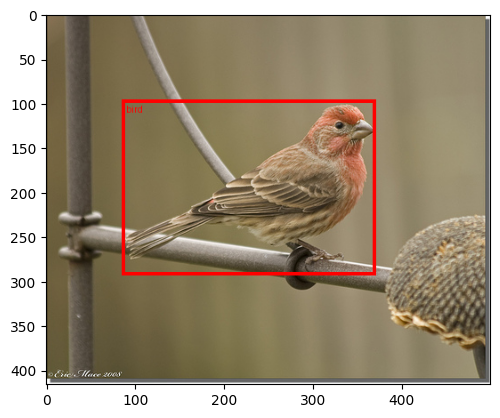

In [ ]:
%matplotlib inline
# Ignore above line unless running in a notebook
from torchvision.io.image import decode_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

import matplotlib.pyplot as plt

img = decode_image("bird.jpg")

# Get the weights as above.
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Get the transforms and create the batch
preprocess = weights.transforms()
batch = preprocess(img).unsqueeze(0)

# Get the model prediction
prediction = model(batch)[0]

# Map prediction labels to categories
labels = [weights.meta["categories"][i] for i in prediction["labels"]]

# Use built-in PyTorch methods for drawing boxes in our image around detected
# objects
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)

# detach() here returns a new Tensor and removes any gradient information.
output = to_pil_image(box.detach())
plt.imshow(output)
plt.show()


Try predicting object bounding boxes for other images, and see whether the network gives you correct or incorrect responses - remember, each model can only predict classes it was trained on...